In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
import pandas as pd
import numpy as np
from population_utils import *

In [2]:
from pylab import *

In [3]:
df1 = pd.read_pickle('/home/niell_lab/data/freely_moving_ephys/batch_files/090221/pooled_ephys_population_update_090221.pickle')

In [4]:
example128ch =  df1[df1['session']=='070921_J553RT_control_Rig2']

In [5]:
matplotlib.rcParams.update({'font.size': 18})

In [43]:
savepath = '/home/niell_lab/Documents/figures/paper_panels/fig2/'

In [24]:
start = 1
rangeT = np.arange(start,start+(60*20))

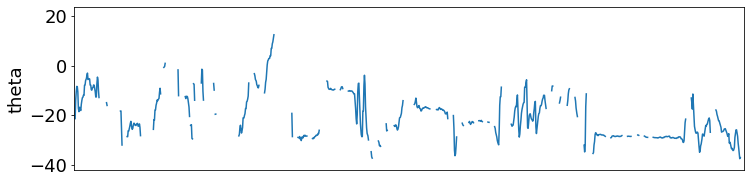

In [25]:
fig, ax = plt.subplots(1,1,figsize=(12,3))
plt.plot(example128ch['fm1_eyeT'].iloc[0][rangeT], example128ch['fm1_theta'].iloc[0][rangeT])
ax.get_xaxis().set_visible(False)
plt.xlim([0,20])
plt.ylabel('theta')
plt.savefig(os.path.join(savepath, 'fig1_theta.png'))

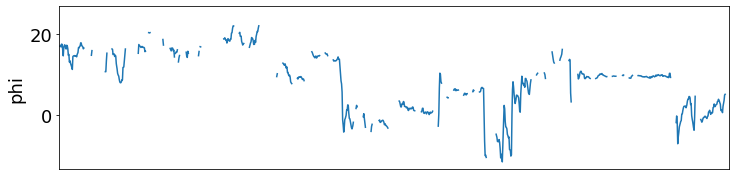

In [26]:
fig, ax = plt.subplots(1,1,figsize=(12,3))
plt.plot(example128ch['fm1_eyeT'].iloc[0][rangeT], example128ch['fm1_phi'].iloc[0][rangeT])
ax.get_xaxis().set_visible(False)
plt.xlim([0,20])
plt.ylabel('phi')
plt.savefig(os.path.join(savepath, 'fig1_phi.png'))

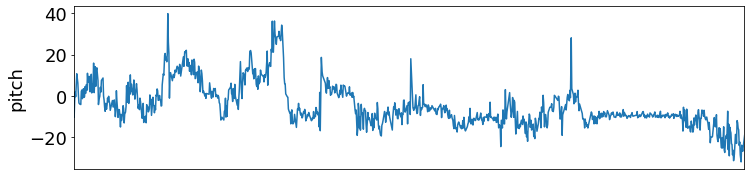

In [28]:
fig, ax = plt.subplots(1,1,figsize=(12,3))
plt.plot(example128ch['fm1_eyeT'].iloc[0][rangeT], example128ch['fm1_pitch_interp'].iloc[0][rangeT])
ax.get_xaxis().set_visible(False)
plt.xlim([0,20])
plt.ylabel('pitch')
plt.savefig(os.path.join(savepath, 'fig1_pitch.png'))

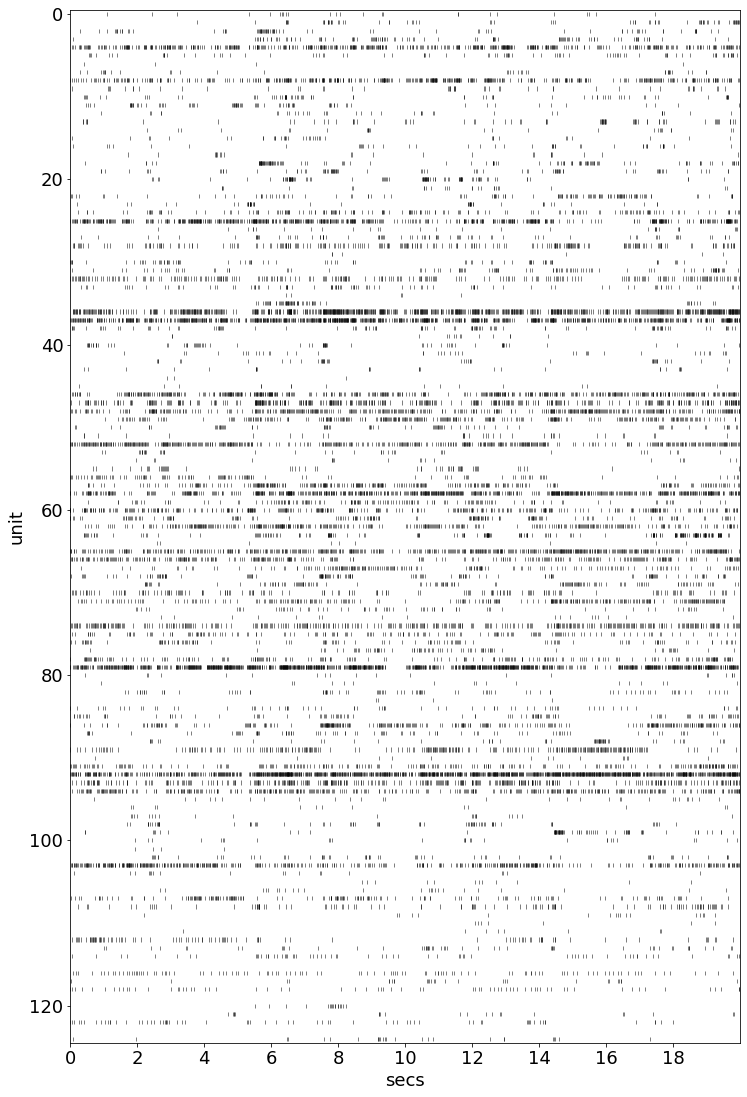

In [30]:
fig, ax = plt.subplots(1,1,figsize=(12,19))
sh_num = 4
sh0 = np.arange(0,len(example128ch.index)+sh_num,sh_num)
full_raster = np.array([]).astype(int)
for sh in range(sh_num):
    full_raster = np.concatenate([full_raster, sh0+sh])
for i, ind in enumerate(example128ch.index):
    i = full_raster[i]
    plt.vlines(example128ch.at[ind,'fm1_spikeT'],i-0.25,i+0.25,'k',linewidth=0.5)
plt.ylim(len(example128ch)+0.5,-.5)
plt.xlabel('secs')
plt.xlim([start,start+20])
plt.xticks(np.arange(1,21,2), labels=np.arange(0,20,2))
plt.ylabel('unit')
plt.savefig(os.path.join(savepath, 'fig1_raster.png'))

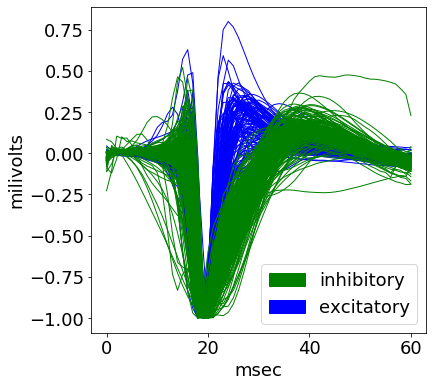

In [33]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
for ind, row in df1['norm_waveform'][df1['waveform_km_label']==0].iteritems():
    plt.plot(row, 'b', linewidth=1)
for ind, row in df1['norm_waveform'][df1['waveform_km_label']==1].iteritems():
    plt.plot(row, 'g', linewidth=1)
bluepatch = mpatches.Patch(color='g', label='inhibitory')
greenpatch = mpatches.Patch(color='b', label='excitatory')
plt.legend(handles=[bluepatch, greenpatch])
plt.ylabel('milivolts'); plt.xlabel('msec')
plt.savefig(os.path.join(savepath, 'fig1_wv.png'))

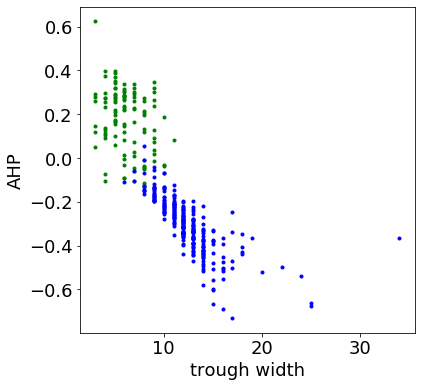

In [34]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.plot(df1['waveform_trough_width'][df1['waveform_peak'] < 0][df1['waveform_km_label']==0], df1['AHP'][df1['waveform_peak'] < 0][df1['waveform_km_label']==0], 'g.')
plt.plot(df1['waveform_trough_width'][df1['waveform_peak'] < 0][df1['waveform_km_label']==1], df1['AHP'][df1['waveform_peak'] < 0][df1['waveform_km_label']==1], 'b.')
plt.ylabel('AHP'); plt.xlabel('trough width')
plt.savefig(os.path.join(savepath, 'fig1_wv_props.png'))

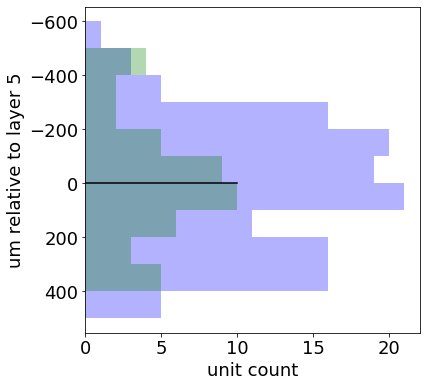

In [38]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.hist(df1['hf1_wn_depth_from_layer5'][df1['waveform_km_label']==1],color='b',bins=np.arange(-600,600,100),alpha=0.3,orientation='horizontal')
plt.hist(df1['hf1_wn_depth_from_layer5'][df1['waveform_km_label']==0],color='g',bins=np.arange(-600,600,100),alpha=0.3,orientation='horizontal')
plt.ylabel('um relative to layer 5'); plt.xlabel('unit count'); ax.invert_yaxis()
plt.plot([0,10],[0,0],'k')
plt.savefig(os.path.join(savepath, 'fig1_depth.png'))

In [39]:
# unit labels, as numbered in unit summary
unit_labels = [42,55,57,71,80,85,89,95,104]
lag_for_unit_labels = [3,2,2,2,2,2,2,2,2]
inds_dict = dict(zip(example128ch['index'].values, example128ch.index.values))
units = [inds_dict[i] for i in unit_labels]
colors = ['tab:orange','tab:purple','tab:green','tab:brown','tab:pink','gold','cadetblue','aqua','lime']

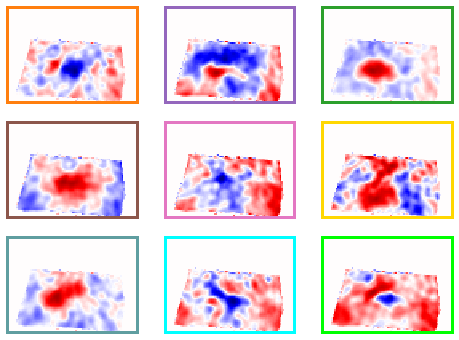

In [54]:
fig = plt.subplots(3,3,figsize=(8,6))
for unit_count in range(len(units)):
    unit_ind = units[unit_count]
    sta = np.reshape(example128ch.loc[unit_ind,'hf1_wn_spike_triggered_average'],tuple(example128ch.loc[unit_ind,'hf1_wn_sta_shape']))
    starange = np.max(np.abs(sta))*1.2
    ax = plt.subplot(3,3,unit_count+1)
    plt.imshow(sta, vmin=-starange, vmax=starange, cmap='seismic')
    plt.axis('off')
    autoAxis = ax.axis()
    rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=3,color=colors[unit_count])
    rec = ax.add_patch(rec)
    rec.set_clip_on(False)
plt.savefig(os.path.join(savepath, 'fig2_wnRF_full.png'))

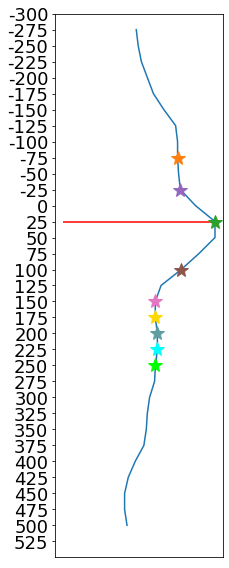

In [64]:
lfp_power_profile = example128ch['hf1_wn_lfp_power_profiles'].iloc[0]
layer5_cent = example128ch['hf1_wn_lfp_layer5_centers'].iloc[0]
ch_spacing = 25 # in um

fig, ax = plt.subplots(1,1,figsize=(3,10))
norm_profile_sh0 = lfp_power_profile[0]
layer5_cent_sh0 = layer5_cent[0]
ax.plot(norm_profile_sh0,range(0,32))
ax.hlines(layer5_cent_sh0, 0, norm_profile_sh0[layer5_cent_sh0], 'r')
ax.set_ylim([33,-1])
ax.set_yticks(ticks=list(range(-1,33)))
ax.set_yticklabels((ch_spacing*np.arange(34)-(layer5_cent_sh0*ch_spacing)))
ax.get_xaxis().set_visible(False)

colors = ['tab:orange','tab:purple','tab:green','tab:brown','tab:pink','gold','cadetblue','aqua','lime']
for i in range(len(units)):
    unit = units[i]
    if df1.loc[unit, 'sh'] == 0:
        ch = int(df1.loc[unit, 'ch'])
        ch_power = norm_profile_sh0[ch]
        ax.plot(ch_power, ch, '*', color=colors[i], markersize=15)
        
plt.savefig(os.path.join(savepath, 'fig2_shank0_depth.png'))

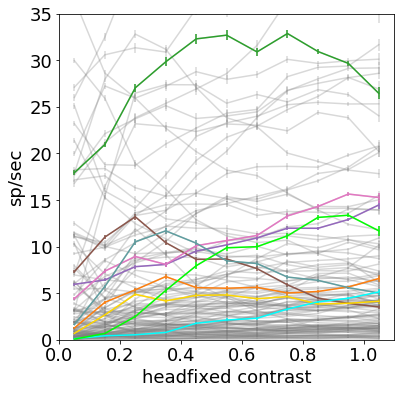

In [69]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
for ind, row in example128ch.iterrows():
    ax.errorbar(row['hf1_wn_crf_cent'],row['hf1_wn_crf_tuning'],yerr=row['hf1_wn_crf_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    ax.errorbar(row['hf1_wn_crf_cent'],row['hf1_wn_crf_tuning'],yerr=row['hf1_wn_crf_err'], color=colors[i])
ax.set_ylabel('sp/sec'); ax.set_xlabel('headfixed contrast')
ax.set_ylim([0,35])
plt.savefig(os.path.join(savepath, 'fig2_contrast_response.png'))

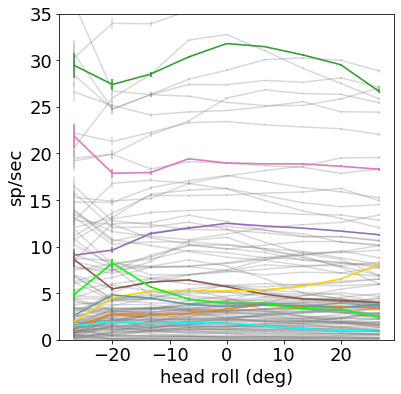

In [70]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
for ind, row in example128ch.iterrows():
    ax.errorbar(row['fm1_spike_rate_vs_roll_cent'],row['fm1_spike_rate_vs_roll_tuning'],yerr=row['fm1_spike_rate_vs_roll_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    ax.errorbar(row['fm1_spike_rate_vs_roll_cent'],row['fm1_spike_rate_vs_roll_tuning'],yerr=row['fm1_spike_rate_vs_roll_err'], color=colors[i])
ax.set_ylabel('sp/sec'); ax.set_xlabel('head roll (deg)')
ax.set_ylim([0,35])
plt.savefig(os.path.join(savepath, 'fig2_roll_response.png'))

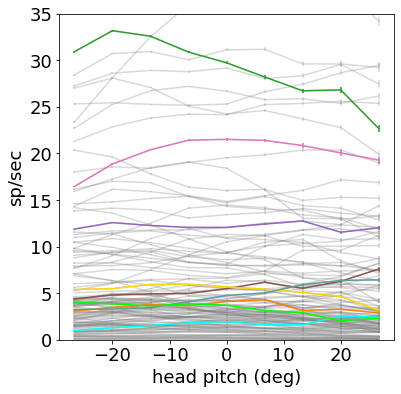

In [71]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
for ind, row in example128ch.iterrows():
    ax.errorbar(row['fm1_spike_rate_vs_pitch_cent'],row['fm1_spike_rate_vs_pitch_tuning'],yerr=row['fm1_spike_rate_vs_pitch_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    ax.errorbar(row['fm1_spike_rate_vs_pitch_cent'],row['fm1_spike_rate_vs_pitch_tuning'],yerr=row['fm1_spike_rate_vs_pitch_err'], color=colors[i])
ax.set_ylabel('sp/sec'); ax.set_xlabel('head pitch (deg)')
ax.set_ylim([0,35])
plt.savefig(os.path.join(savepath, 'fig2_pitch_response.png'))

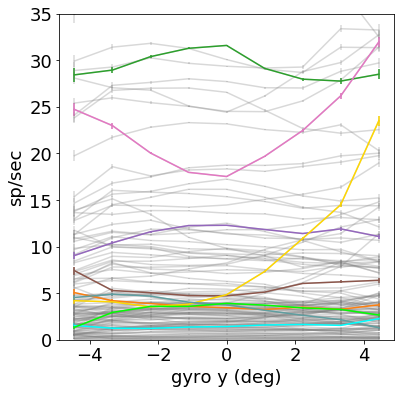

In [72]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
for ind, row in example128ch.iterrows():
    ax.errorbar(row['fm1_spike_rate_vs_gy_cent'],row['fm1_spike_rate_vs_gy_tuning'],yerr=row['fm1_spike_rate_vs_gy_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    ax.errorbar(row['fm1_spike_rate_vs_gy_cent'],row['fm1_spike_rate_vs_gy_tuning'],yerr=row['fm1_spike_rate_vs_gy_err'], color=colors[i])
ax.set_ylabel('sp/sec'); ax.set_xlabel('gyro y (deg)')
ax.set_ylim([0,35])
plt.savefig(os.path.join(savepath, 'fig2_gy_response.png'))

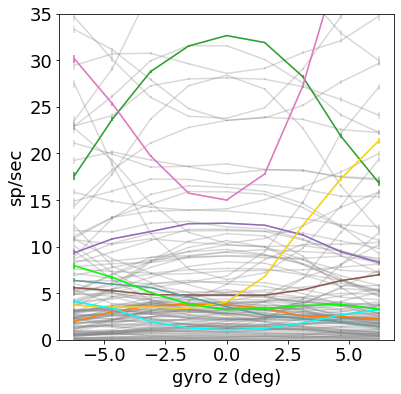

In [73]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
for ind, row in example128ch.iterrows():
    ax.errorbar(row['fm1_spike_rate_vs_gz_cent'],row['fm1_spike_rate_vs_gz_tuning'],yerr=row['fm1_spike_rate_vs_gz_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    ax.errorbar(row['fm1_spike_rate_vs_gz_cent'],row['fm1_spike_rate_vs_gz_tuning'],yerr=row['fm1_spike_rate_vs_gz_err'], color=colors[i])
ax.set_ylabel('sp/sec'); ax.set_xlabel('gyro z (deg)')
ax.set_ylim([0,35])
plt.savefig(os.path.join(savepath, 'fig2_gz_response.png'))

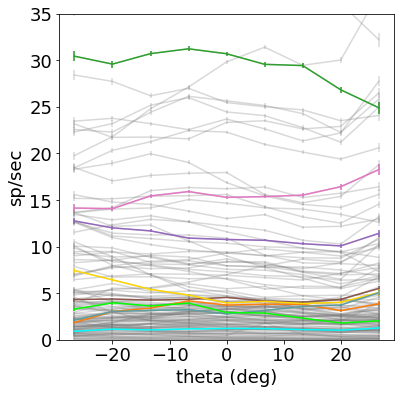

In [85]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
for ind, row in example128ch.iterrows():
    ax.errorbar(row['fm1_spike_rate_vs_theta_cent'],row['fm1_spike_rate_vs_theta_tuning'],yerr=row['fm1_spike_rate_vs_theta_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    ax.errorbar(row['fm1_spike_rate_vs_theta_cent'],row['fm1_spike_rate_vs_theta_tuning'],yerr=row['fm1_spike_rate_vs_theta_err'], color=colors[i])
ax.set_ylabel('sp/sec'); ax.set_xlabel('theta (deg)')
ax.set_ylim([0,35])
plt.savefig(os.path.join(savepath, 'fig2_theta_response.png'))

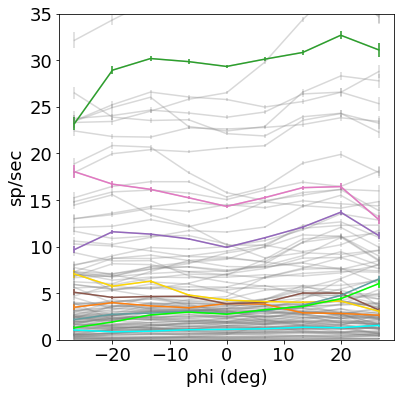

In [86]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
for ind, row in example128ch.iterrows():
    ax.errorbar(row['fm1_spike_rate_vs_phi_cent'],row['fm1_spike_rate_vs_phi_tuning'],yerr=row['fm1_spike_rate_vs_phi_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    ax.errorbar(row['fm1_spike_rate_vs_phi_cent'],row['fm1_spike_rate_vs_phi_tuning'],yerr=row['fm1_spike_rate_vs_phi_err'], color=colors[i])
ax.set_ylabel('sp/sec'); ax.set_xlabel('phi (deg)')
ax.set_ylim([0,35])
plt.savefig(os.path.join(savepath, 'fig2_phi_response.png'))

In [87]:
[i for i in df1.columns.values if 'rad' in i]

['fm1_spike_rate_vs_pupil_radius_cent',
 'fm1_spike_rate_vs_pupil_radius_tuning',
 'fm1_spike_rate_vs_pupil_radius_err',
 'hf1_wn_spike_rate_vs_pupil_radius_cent',
 'hf1_wn_spike_rate_vs_pupil_radius_tuning',
 'hf1_wn_spike_rate_vs_pupil_radius_err',
 'hf2_sprasenoiseflash_spike_rate_vs_pupil_radius_cent',
 'hf2_sprasenoiseflash_spike_rate_vs_pupil_radius_tuning',
 'hf2_sprasenoiseflash_spike_rate_vs_pupil_radius_err',
 'hf3_gratings_spike_rate_vs_pupil_radius_cent',
 'hf3_gratings_spike_rate_vs_pupil_radius_tuning',
 'hf3_gratings_spike_rate_vs_pupil_radius_err',
 'hf4_revchecker_spike_rate_vs_pupil_radius_cent',
 'hf4_revchecker_spike_rate_vs_pupil_radius_tuning',
 'hf4_revchecker_spike_rate_vs_pupil_radius_err',
 'hf2_sparsenoiseflash_spike_rate_vs_pupil_radius_cent',
 'hf2_sparsenoiseflash_spike_rate_vs_pupil_radius_tuning',
 'hf2_sparsenoiseflash_spike_rate_vs_pupil_radius_err',
 'fm_dark_spike_rate_vs_pupil_radius_cent',
 'fm_dark_spike_rate_vs_pupil_radius_tuning',
 'fm_dark_spi

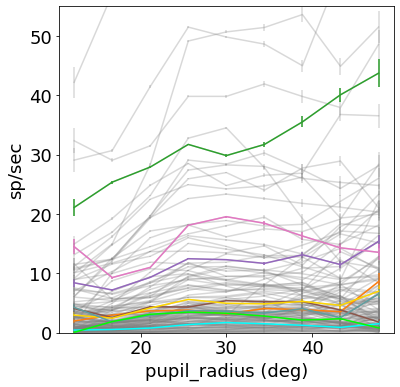

In [90]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
for ind, row in example128ch.iterrows():
    ax.errorbar(row['fm1_spike_rate_vs_pupil_radius_cent'],row['fm1_spike_rate_vs_pupil_radius_tuning'],yerr=row['fm1_spike_rate_vs_pupil_radius_err'], alpha=0.3, color='gray')
for i in range(len(units)):
    unit = units[i]
    row = example128ch.loc[unit]
    ax.errorbar(row['fm1_spike_rate_vs_pupil_radius_cent'],row['fm1_spike_rate_vs_pupil_radius_tuning'],yerr=row['fm1_spike_rate_vs_pupil_radius_err'], color=colors[i])
ax.set_ylabel('sp/sec'); ax.set_xlabel('pupil_radius (deg)')
ax.set_ylim([0,55])
plt.savefig(os.path.join(savepath, 'fig2_pupil_radius_response.png'))

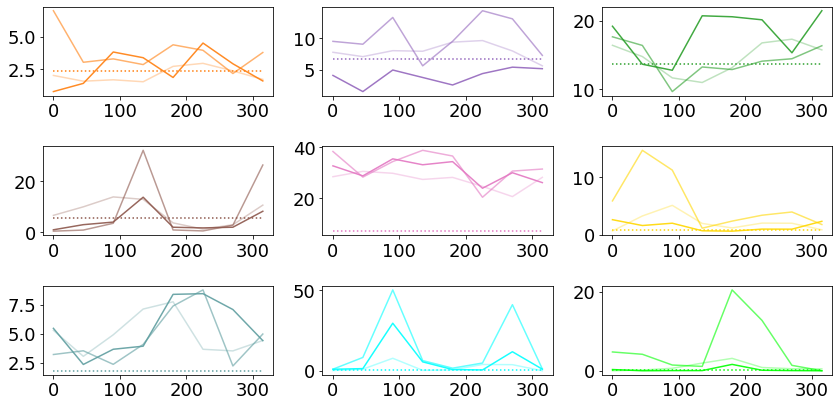

In [83]:
fig = plt.subplots(3,3,figsize=(12,6))
for unit_count in range(len(units)):
    ax = plt.subplot(3,3,unit_count+1)
    unit_ind = units[unit_count]
    ori_tuning = np.mean(df1.at[unit_ind, 'hf3_gratings_ori_tuning'],2) # [orientation, sf, tf]
    drift_spont = df1.at[unit_ind, 'hf3_gratings_drift_spont']
    tuning = ori_tuning - drift_spont
    tuning[tuning < 0] = 0
    c = colors[unit_count]
    ax.plot(np.arange(8)*45, ori_tuning[:,0],color=c, alpha=0.3) # low sf
    ax.plot(np.arange(8)*45, ori_tuning[:,1],color=c, alpha=0.6) # mid sf
    ax.plot(np.arange(8)*45, ori_tuning[:,2],color=c, alpha=0.9) # high sf
    ax.plot([0,315],[drift_spont,drift_spont],':',color=c,label='spont')
plt.tight_layout()
plt.show()

In [92]:
df1['session'].unique()

array(['012521_EE8P6LT_control_Rig2', '012821_EE8P6LT_control_Rig2',
       '021621_EE11P1LT_control_Rig2', '030921_EE11P13LTRN_control_Rig2',
       '062221_G6H31P2RT_control_Rig2', '062921_G6HCK1ALTRN_control_Rig2',
       '070621_J553LT_control_Rig2', '070921_J553RT_control_Rig2',
       '072721_J564LT_control_Rig2', '081221_J557RT_control_Rig2', nan],
      dtype=object)

In [93]:
exampleLightDark = df1[df1['session']=='081221_J557RT_control_Rig2'].copy()

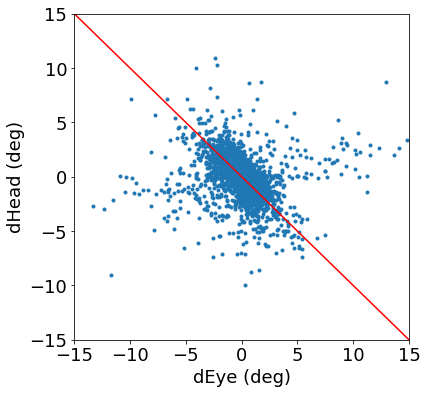

In [95]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
dEye = exampleLightDark['fm1_dEye'].iloc[0]
dhead = exampleLightDark['fm1_dHead'].iloc[0]
eyeT = exampleLightDark['fm1_eyeT'].iloc[0]
if len(dEye[0:-1:10]) == len(dhead(eyeT[0:-1:10])):
    plt.plot(dEye[0:-1:10],dhead(eyeT[0:-1:10]),'.')
elif len(dEye[0:-1:10]) > len(dhead(eyeT[0:-1:10])):
    plt.plot(dEye[0:-1:10][:len(dhead(eyeT[0:-1:10]))],dhead(eyeT[0:-1:10]),'.')
elif len(dEye[0:-1:10]) < len(dhead(eyeT[0:-1:10])):
    plt.plot(dEye[0:-1:10],dhead(eyeT[0:-1:10])[:len(dEye[0:-1:10])],'.')
plt.xlabel('dEye (deg)'); plt.ylabel('dHead (deg)'); plt.xlim((-15,15)); plt.ylim((-15,15))
plt.plot([-15,15],[15,-15], 'r')
plt.savefig('/home/niell_lab/Documents/figures/paper_panels/fig3/fig3_deyedhead.png')

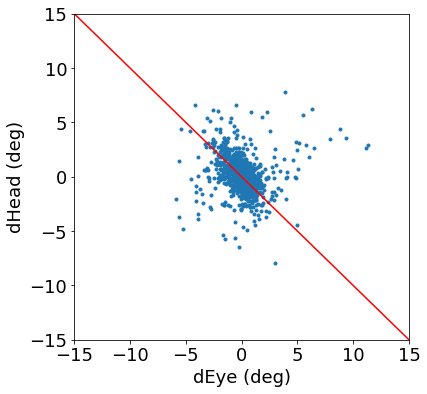

In [96]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
dEye = exampleLightDark['fm_dark_dEye'].iloc[0]
dhead = exampleLightDark['fm_dark_dHead'].iloc[0]
eyeT = exampleLightDark['fm_dark_eyeT'].iloc[0]
if len(dEye[0:-1:10]) == len(dhead(eyeT[0:-1:10])):
    plt.plot(dEye[0:-1:10],dhead(eyeT[0:-1:10]),'.')
elif len(dEye[0:-1:10]) > len(dhead(eyeT[0:-1:10])):
    plt.plot(dEye[0:-1:10][:len(dhead(eyeT[0:-1:10]))],dhead(eyeT[0:-1:10]),'.')
elif len(dEye[0:-1:10]) < len(dhead(eyeT[0:-1:10])):
    plt.plot(dEye[0:-1:10],dhead(eyeT[0:-1:10])[:len(dEye[0:-1:10])],'.')
plt.xlabel('dEye (deg)'); plt.ylabel('dHead (deg)'); plt.xlim((-15,15)); plt.ylim((-15,15))
plt.plot([-15,15],[15,-15], 'r')
plt.savefig('/home/niell_lab/Documents/figures/paper_panels/fig3/fig3_deyedhead_dark.png')

In [130]:
len(df1['hf1_wn_spike_triggered_average'].map(np.sum).dropna())

416

In [147]:
labels

['negative', 'early', 'biphasic', 'late']

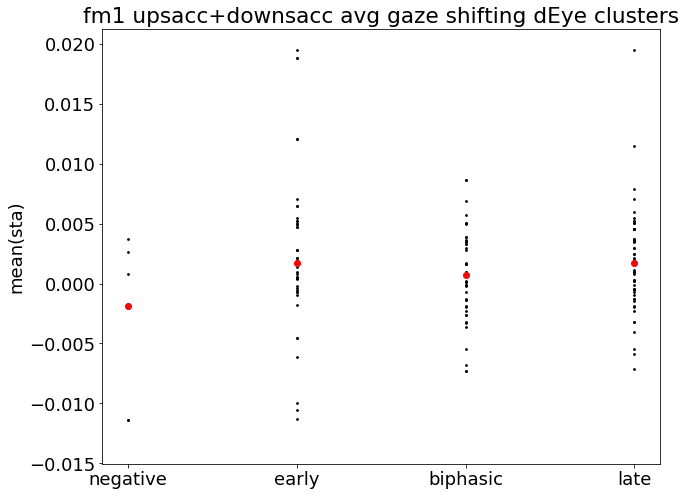

In [214]:
# do units with negative STA regions fall into negative movement response cluster?
fig, ax = plt.subplots(1,1, figsize=(10,8))
labels = ['negative', 'early', 'biphasic', 'late']
colors = ['b','r','g','c']
for i in range(len(labels)):
    c = colors[i]
    cluster = labels[i]
    upsta = df1['hf1_wn_spike_triggered_average'][df1['responsive_to_contrast']==True][df1['fm1_upsacc_avg_gaze_shift_dEye_cluster_type']==cluster]
    downsta = df1['hf1_wn_spike_triggered_average'][df1['responsive_to_contrast']==True][df1['fm1_downsacc_avg_gaze_shift_dEye_cluster_type']==cluster]
    stasum_up = upsta.map(np.nanmean)# np.abs(upsta.map(np.nanmax)/upsta.map(np.nanmin))
    stasum_dn = downsta.map(np.nanmean)# np.abs(downsta.map(np.nanmax)/downsta.map(np.nanmin))
    plt.scatter(np.ones(len(stasum_up))*i, stasum_up, s=3, color='k')
    plt.scatter(np.ones(len(stasum_dn))*i, stasum_dn, s=3, color='k')
    stasum_all = pd.concat([stasum_up, stasum_dn], axis=0)
    plt.plot(i, np.median(stasum_all), 'ro')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.title('fm1 upsacc+downsacc avg gaze shifting dEye clusters')
plt.ylabel('mean(sta)')
plt.show()

In [157]:
exampleLightDark1 = exampleLightDark = df1[df1['session']=='072721_J564LT_control_Rig2'].copy()

In [173]:
gazeshift_unit_labels = [126,242,241,305,301,224] # choose six
gazeshift_inds_dict = dict(zip(exampleLightDark1['index'].values, exampleLightDark1.index.values))
gazeshift_units = [gazeshift_inds_dict[i] for i in gazeshift_unit_labels]

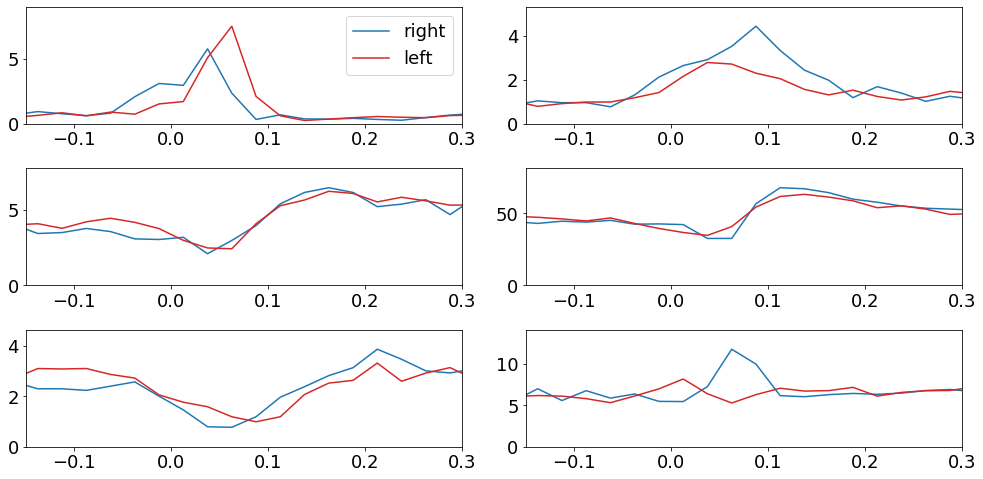

In [179]:
fig = plt.subplots(3,2,figsize=(14,7))
for unit_count in range(len(gazeshift_units)):
    ax = plt.subplot(3,2,unit_count+1)
    ind = gazeshift_units[unit_count]
    trange = df1.at[ind, 'fm1_trange']
    upsacc_avg = df1.at[ind, 'fm1_upsacc_avg']
    downsacc_avg = df1.at[ind, 'fm1_downsacc_avg']
    ax.plot(0.5*(trange[0:-1]+ trange[1:]),upsacc_avg[:], 'tab:blue')
    ax.plot(0.5*(trange[0:-1]+ trange[1:]),downsacc_avg[:],'tab:red')
    if unit_count == 0:
        ax.legend(['right','left'], loc=1)
    maxval = np.max(np.maximum(upsacc_avg[:],downsacc_avg[:]))
    ax.set_ylim([0,maxval*1.2])
    ax.set_xlim([-0.15,0.3])
plt.tight_layout()
plt.show()

In [184]:
waveform_keys = ['fm1_upsacc_avg_gaze_shift_dEye', 'fm1_downsacc_avg_gaze_shift_dEye']

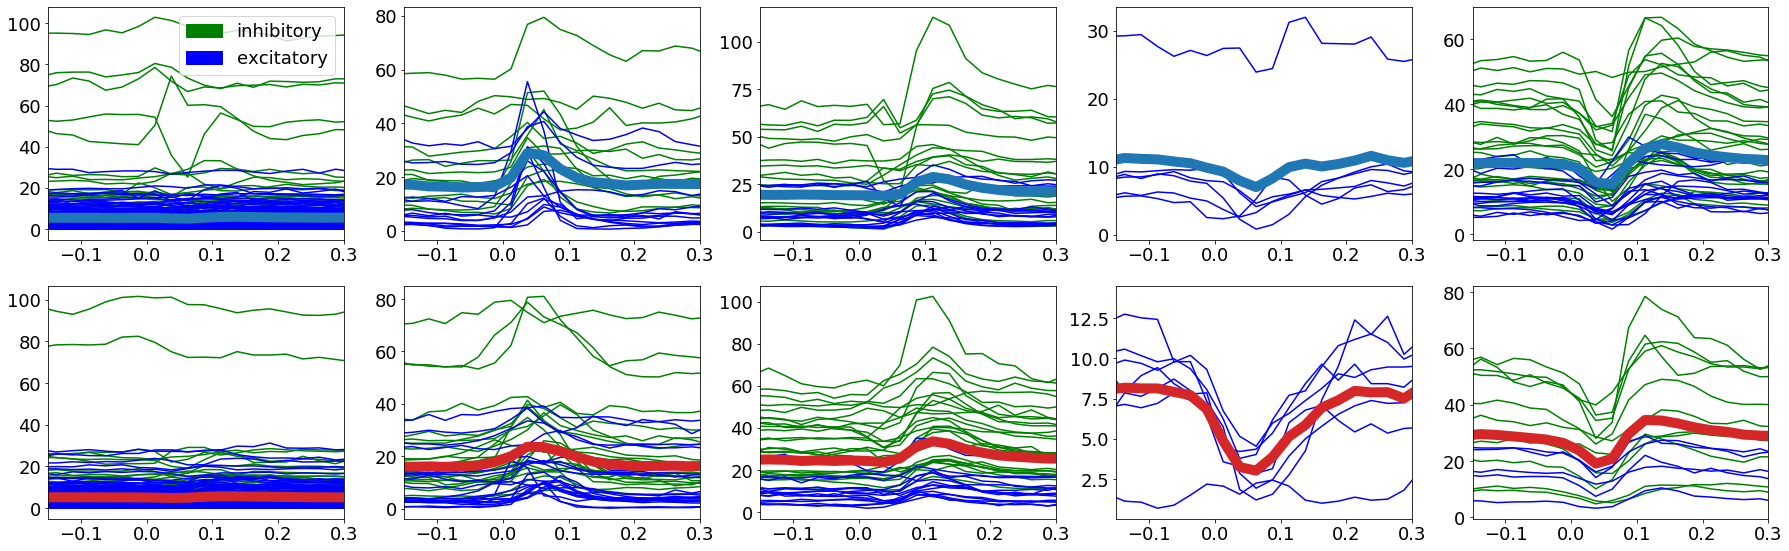

In [211]:
waveforms = df1[waveform_keys].values.flatten()
wv_inds = list(np.floor(np.arange(0, len(df1[waveform_keys].values), 1/len(waveform_keys))).astype(int))
baselines = np.zeros([len(waveforms), 1])
nested_waveforms = np.zeros([len(waveforms), 20])
for ind in range(len(waveforms)):
    wv = waveforms[ind]
    if type(wv) == np.ndarray:
        baseline = np.mean(wv[:25])
        cent_wv = [i-baseline for i in wv]
        nested_waveforms[ind] = cent_wv[35:55]
        baselines[ind] = baseline
    else:
        baselines[ind] = np.nan
wvlen = len(nested_waveforms[0])
flat_waveforms = np.zeros([len(nested_waveforms), wvlen])
unnorm_waveforms = np.zeros([len(nested_waveforms), wvlen])
for i in range(len(nested_waveforms)):
    if ~np.isnan(nested_waveforms[i]).all():
        if (np.max(np.abs(nested_waveforms[i]))/baselines[i]) > 0.1 and np.max(np.abs(nested_waveforms[i]))>4:
            flat_waveforms[i,:] = nested_waveforms[i] / np.max(np.abs(nested_waveforms[i]))
        unnorm_waveforms[i,:] = nested_waveforms[i]
km_labels = KMeans(n_clusters=5).fit(flat_waveforms[~np.isnan(flat_waveforms).any(axis=1)]).labels_
km_labels = np.nan_to_num(km_labels, 0)

plt.subplots(2,5, figsize=(25,8))
count = 1
mean_cluster_all_keys = {}
for key in waveform_keys:
    mean_cluster = []
    for label in range(5):
        plt.subplot(2,5,count)
        inhibitory_nested = df1[key][df1[key+'_cluster']==label][df1['waveform_km_label']==0].ravel()
#         plt.title('key='+str(key)+' cluster='+str(label)+' count='+str(len(df1[key][df1[key+'_cluster']==label].dropna())))
        sz1 = (np.size(inhibitory_nested, 0) if type(inhibitory_nested) != np.float else 0)
        for i in range(sz1):
            temp_sz0 = (len(inhibitory_nested[i]) if type(inhibitory_nested[i]) != np.float else 0)
            if temp_sz0 > 0:
                sz0 = temp_sz0
        if sz0 > 0 and sz1 > 0:
            inhibitory = np.zeros([sz1,sz0])
            for i in range(sz1):
                inhibitory[i,:] = inhibitory_nested[i]
            plt.plot(0.5*(trange[0:-1]+ trange[1:]), inhibitory.T, 'g')
        else:
            inhibitory = np.nan
        excitatory_nested = df1[key][df1[key+'_cluster']==label][df1['waveform_km_label']==1].ravel()
        sz1 = (np.size(excitatory_nested, 0) if type(excitatory_nested) != np.float else 0)
        for i in range(sz1):
            temp_sz0 = (len(excitatory_nested[i]) if type(excitatory_nested[i]) != np.float else 0)
            if temp_sz0 > 0:
                sz0 = temp_sz0
        if sz0 > 0 and sz1 > 0:
            excitatory = np.zeros([sz1,sz0])
            for i in range(sz1):
                excitatory[i,:] = excitatory_nested[i]
            plt.plot(0.5*(trange[0:-1]+ trange[1:]), excitatory.T, 'b')
        else:
            excitatory = np.nan
        if type(inhibitory) != float or type(excitatory) != float:
            if type(inhibitory) != float and type(excitatory) != float:
                all_units = np.nanmean(np.concatenate([inhibitory, excitatory], axis=0), axis=0)
            elif type(inhibitory) != float and type(excitatory) == float:
                all_units = np.nanmean(inhibitory, axis=0)
            elif type(inhibitory) == float and type(excitatory) != float:
                all_units = np.nanmean(excitatory, axis=0)
            mean_cluster.append(all_units)
            if count < 6:
                plt.plot(0.5*(trange[0:-1]+ trange[1:]), all_units, 'tab:blue', linewidth=10)
            else:
                plt.plot(0.5*(trange[0:-1]+ trange[1:]), all_units, 'tab:red', linewidth=10)
        else:
            mean_cluster.append(np.nan)
        plt.xlim([-0.15,0.3])
        if count == 1:
            plt.legend(handles=[bluepatch, greenpatch])
        count += 1
    mean_cluster_all_keys[key] = mean_cluster
plt.tight_layout()

In [163]:
exampleLightDark1[exampleLightDark1['fm1_upsacc_avg_gaze_shift_dEye_cluster_type']=='late']

,level_0,index,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,...,fm_dark_upsacc_avg_comp_dHead_cluster,fm_dark_downsacc_avg_comp_dHead_cluster,fm1_upsacc_avg_comp_dEye_cluster_type,fm1_downsacc_avg_comp_dEye_cluster_type,fm1_upsacc_avg_comp_dHead_cluster_type,fm1_downsacc_avg_comp_dHead_cluster_type,fm_dark_upsacc_avg_comp_dEye_cluster_type,fm_dark_downsacc_avg_comp_dEye_cluster_type,fm_dark_upsacc_avg_comp_dHead_cluster_type,fm_dark_downsacc_avg_comp_dHead_cluster_type
333,333.0,142.0,2135.3,6.7,good,80.181541,50.0,325.0,1.729921,good,...,0.0,0.0,early,early,early,unresponsive,unresponsive,unresponsive,unresponsive,unresponsive
336,336.0,150.0,1917.3,0.9,good,177.173859,52.0,275.0,7.599985,good,...,0.0,0.0,early,early,early,unresponsive,unresponsive,unresponsive,unresponsive,unresponsive
356,356.0,248.0,2241.4,2.8,good,97.273949,82.0,325.0,1.796816,good,...,0.0,0.0,unresponsive,unresponsive,unresponsive,unresponsive,unresponsive,unresponsive,unresponsive,unresponsive


In [165]:
exampleLightDark1[exampleLightDark1['fm1_downsacc_avg_gaze_shift_dEye_cluster_type']=='late']

,level_0,index,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,...,fm_dark_upsacc_avg_comp_dHead_cluster,fm_dark_downsacc_avg_comp_dHead_cluster,fm1_upsacc_avg_comp_dEye_cluster_type,fm1_downsacc_avg_comp_dEye_cluster_type,fm1_upsacc_avg_comp_dHead_cluster_type,fm1_downsacc_avg_comp_dHead_cluster_type,fm_dark_upsacc_avg_comp_dEye_cluster_type,fm_dark_downsacc_avg_comp_dEye_cluster_type,fm_dark_upsacc_avg_comp_dHead_cluster_type,fm_dark_downsacc_avg_comp_dHead_cluster_type
313,313.0,17.0,1447.8,4.2,good,109.624107,6.0,625.0,8.316521,good,...,0.0,0.0,late,early,biphasic,late,unresponsive,unresponsive,unresponsive,unresponsive
323,323.0,108.0,2261.9,5.0,good,126.312935,38.0,625.0,22.124431,good,...,0.0,0.0,late,biphasic,biphasic,late,negative,unresponsive,unresponsive,unresponsive
325,325.0,110.0,1365.1,0.9,good,89.441055,39.0,600.0,13.822842,good,...,0.0,0.0,late,early,early,late,unresponsive,unresponsive,unresponsive,unresponsive
329,329.0,134.0,1145.2,2.6,good,79.449341,48.0,375.0,26.794361,good,...,3.0,4.0,late,early,early,late,negative,unresponsive,unresponsive,negative
336,336.0,150.0,1917.3,0.9,good,177.173859,52.0,275.0,7.599985,good,...,0.0,0.0,early,early,early,unresponsive,unresponsive,unresponsive,unresponsive,unresponsive
345,345.0,195.0,1672.6,0.9,good,125.059631,68.0,675.0,31.762731,good,...,3.0,4.0,late,biphasic,biphasic,early,negative,biphasic,unresponsive,negative
346,346.0,199.0,1318.5,4.6,good,95.968300,69.0,650.0,7.407461,good,...,0.0,0.0,biphasic,unresponsive,unresponsive,late,unresponsive,unresponsive,unresponsive,unresponsive
347,347.0,200.0,1276.7,3.7,good,106.713425,69.0,650.0,12.748734,good,...,2.0,1.0,late,unresponsive,unresponsive,late,unresponsive,early,early,early
355,355.0,245.0,1404.9,2.6,good,89.377846,81.0,350.0,1.663025,good,...,0.0,0.0,late,unresponsive,unresponsive,unresponsive,unresponsive,unresponsive,unresponsive,unresponsive
361,361.0,269.0,1854.2,0.8,good,134.074310,90.0,125.0,20.730778,good,...,4.0,4.0,late,unresponsive,unresponsive,late,unresponsive,negative,negative,negative
